# Expected Score Prediction based on number of hours they studied

This is a simple linear regression task as it involves just two variables.

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Plotting the distribution of scores

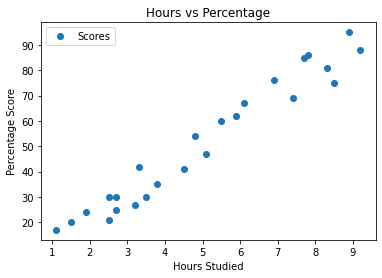

In [4]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the data

In [5]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [6]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [7]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
print(X_train)

[[7.7]
 [6.1]
 [7.4]
 [3.5]
 [3.2]
 [2.7]
 [9.2]
 [5.5]
 [3.8]
 [5.1]
 [2.5]
 [2.5]
 [8.9]
 [7.8]
 [6.9]
 [2.7]
 [8.3]
 [4.5]
 [5.9]
 [1.5]]


In [10]:
print(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [11]:
print(y_train)

[85 67 69 30 27 30 88 60 35 47 30 21 95 86 76 25 81 41 62 20]


In [12]:
print(y_test)

[17 42 24 75 54]


# Training the Simple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [14]:
y_pred = regressor.predict(X_test)

y_test is actual salary y_pred is predicted salary

In [15]:
print(y_pred)

[ 9.97026179 32.98470004 18.33914843 87.38246316 48.67636248]


# Comparing Actual vs Predicted

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# Visualising the Training set results

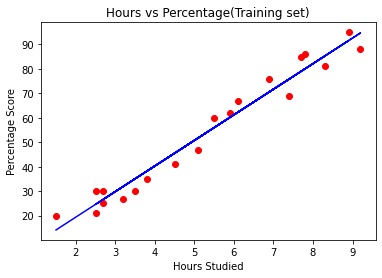

In [17]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Visualising the Test set results

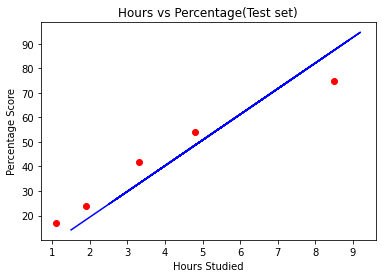

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# test with our own data

In [19]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 95.22829438402952


# Getting the final linear regression equation with the values of the coefficients ie b0 and b1 value

In [20]:
print(regressor.coef_)

[10.46110829]


In [21]:
print(regressor.intercept_)

-1.5369573315500702


# Evaluating the model

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.882398086270432
